<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu7/Minggu7_2241720045_TirtaNBP_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 7: Clustering
# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# NO: 27

# Tugas Praktikum
## Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memuat data
df = pd.read_csv('/content/drive/MyDrive/dataset/Minggu7/Mall_Customers.csv')

# Menampilkan 5 baris pertama
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)


In [50]:
# Pilih hanya dua fitur: Annual Income dan Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Hasil seleksi fitur
print("Hasil Seleksi Fitur:")
print(X.head())

Hasil Seleksi Fitur:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.


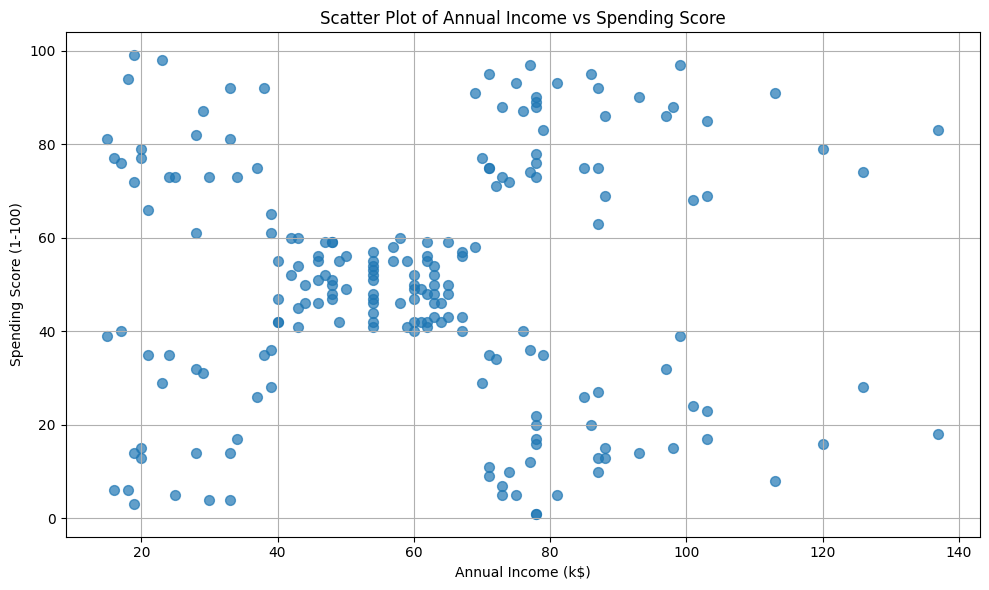

In [52]:
# Plot tanpa variasi warna untuk Age atau Gender
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50, alpha=0.7)

# Menambahkan judul dan label
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

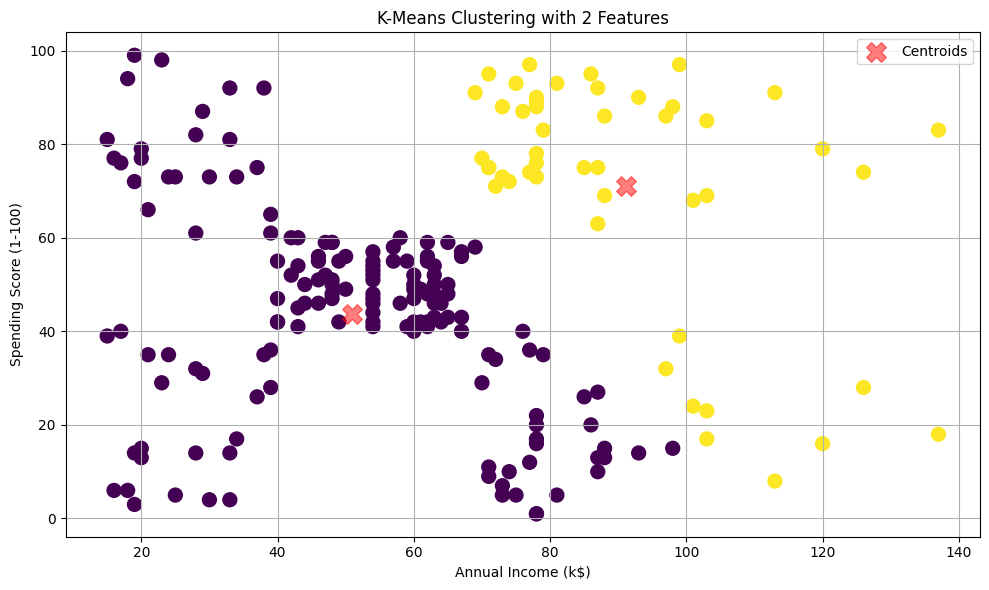

In [58]:
# Inisiasi obyek KMeans dengan n_clusters=2
cl_kmeans = KMeans(n_clusters=2, random_state=42)

# Fit dan prediksi model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasil cluster
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=100, c=y_kmeans, cmap='viridis')

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids')

# Menambahkan judul dan label
plt.title('K-Means Clustering with 2 Features')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.tight_layout()

# Menampilkan plot
plt.show()

In [55]:
# Cek nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 183653.3289473683


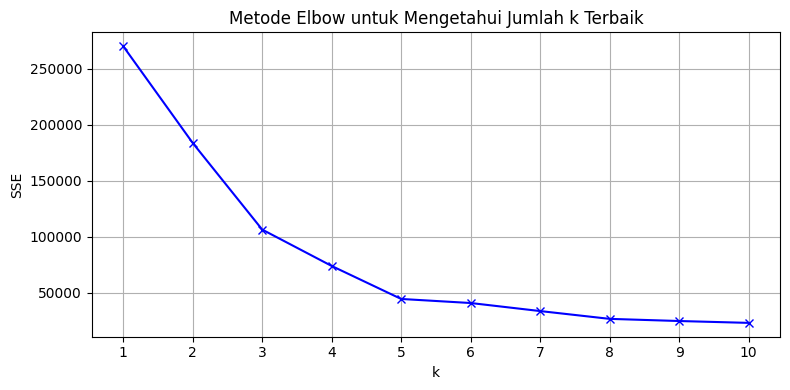

In [56]:
# Implementasi Metode Elbow
def elbow_method(data, max_k):
    # List nilai SSE
    sse = []

    # Cari k terbaik dari 1 hingga max_k
    K = range(1, max_k + 1)

    # Cek nilai SSE setiap k
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(data)
        sse.append(kmeanModel.inertia_)

    # Plotting the distortions
    plt.figure(figsize=(8, 4))
    plt.plot(K, sse, "bx-")
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
    plt.xticks(K)  # Menampilkan semua nilai k pada sumbu X
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Return nilai SSE untuk digunakan di Kode Program 5
    return sse

# Menjalankan fungsi metode elbow dan menyimpan hasil SSE
sse = elbow_method(X, max_k=10)

In [57]:
# Menampilkan Nilai SSE setiap k
def print_sse(sse):
    for idx, sse_val in enumerate(sse, start=1):
        print(f'k={idx}; SSE={sse_val}')

# Memanggil fungsi untuk menampilkan SSE setiap k
print_sse(sse)

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [72]:
# Install library
!pip install minisom

In [73]:
# Import library yang diperlukan
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Load dataset
file_path = '/content/drive/MyDrive/dataset/Minggu7/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [75]:
# Ekstrak fitur yang dibutuhkan: Annual Income (k$) dan Spending Score (1-100)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [77]:
# Normalisasi data
features = features / features.max(axis=0)

# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], features.shape[1], sigma=0.5, learning_rate=0.5)

# Inisialisasi bobot secara acak
som.random_weights_init(features)

# Pelatihan SOM
num_epochs = 100
som.train_random(features, num_epochs)

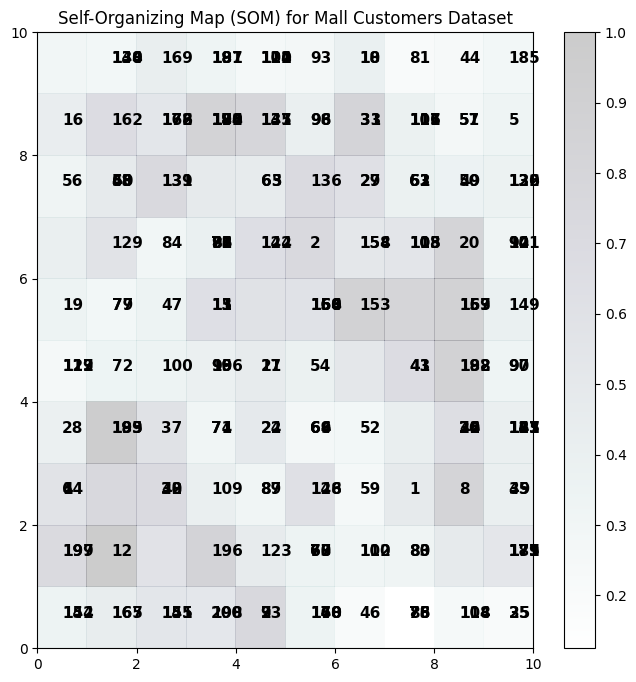

In [78]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(features):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
plt.title('Self-Organizing Map (SOM) for Mall Customers Dataset')
plt.show()

In [79]:
# Install library
!pip install minisom skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [80]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [81]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [82]:
# Load citra Merak dari Google Drive
merak_path = '/content/drive/MyDrive/dataset/Minggu7/merak.jpg'
merak = io.imread(merak_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [83]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(merak, num_epochs, initial_learning_rate, initial_neighborhood_radius)

KeyboardInterrupt: 

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Merak')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()